In [148]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [149]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [150]:
# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(28, activation='relu'),
    Dropout(0.2),
    Dense(14, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [151]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [152]:
# Train the model
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2, batch_size=64)

Epoch 1/20
750/750 [==============================] - 4s 4ms/step - loss: 0.7320 - accuracy: 0.7625 - val_loss: 0.3038 - val_accuracy: 0.9145
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.5510 - accuracy: 0.8316 - val_loss: 0.2941 - val_accuracy: 0.9198
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.5173 - accuracy: 0.8435 - val_loss: 0.2528 - val_accuracy: 0.9305
Epoch 4/20
750/750 [==============================] - 3s 3ms/step - loss: 0.4950 - accuracy: 0.8516 - val_loss: 0.2609 - val_accuracy: 0.9293
Epoch 5/20
750/750 [==============================] - 3s 3ms/step - loss: 0.4821 - accuracy: 0.8559 - val_loss: 0.2568 - val_accuracy: 0.9293
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.4778 - accuracy: 0.8576 - val_loss: 0.2499 - val_accuracy: 0.9301
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.4733 - accuracy: 0.8587 - val_loss: 0.2688 - val_accuracy: 0.9275
Epoch 

In [153]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.2569 - accuracy: 0.9328 - 857ms/epoch - 3ms/step


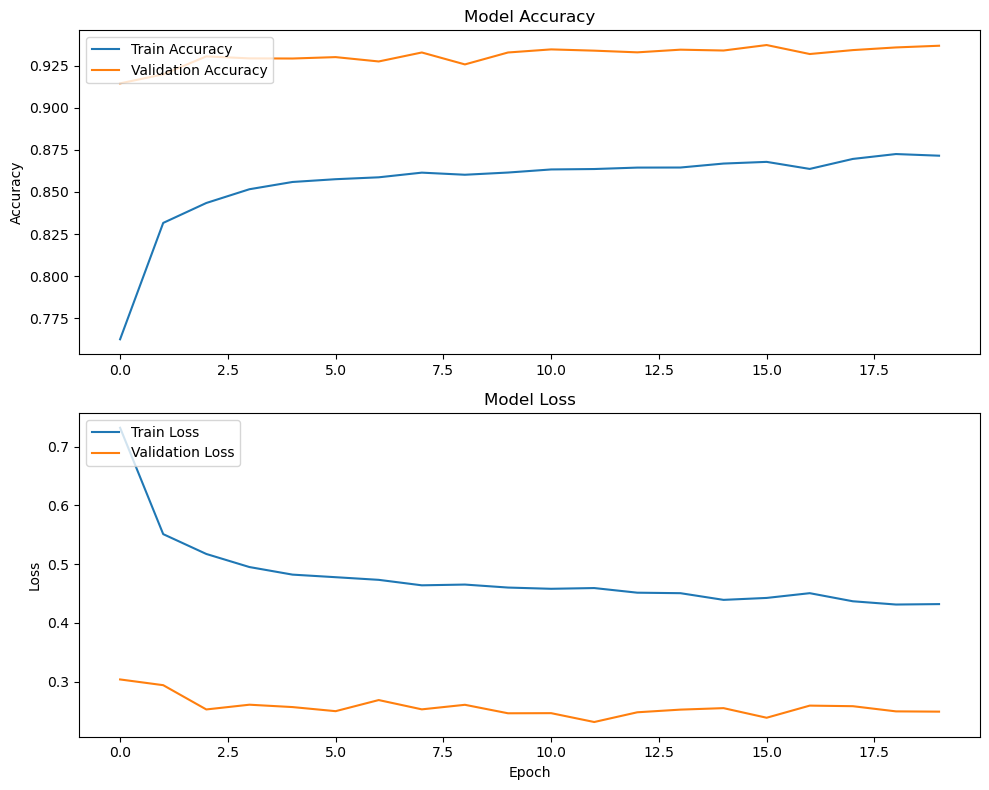

In [154]:
# Visualize the training results
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot training & validation accuracy values
axs[0].plot(history.history['accuracy'], label='Train Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Model Accuracy')
axs[0].legend(loc='upper left')

# Plot training & validation loss values
axs[1].plot(history.history['loss'], label='Train Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_title('Model Loss')
axs[1].legend(loc='upper left')


plt.tight_layout()
plt.show()

In [155]:
# Make predictions
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


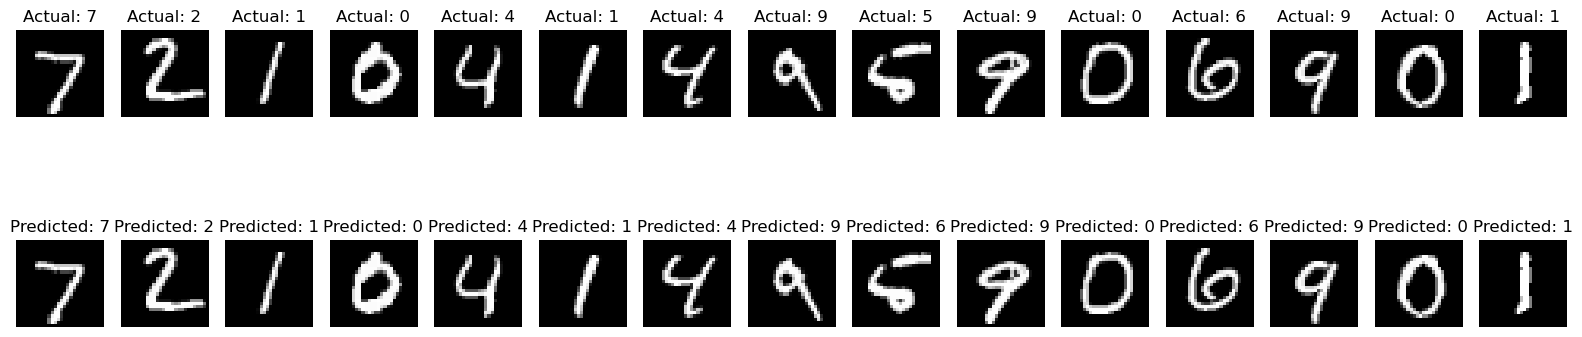

Test loss: 0.25685423612594604
Test accuracy: 0.9327999949455261


In [156]:
# Plot predicted vs actual
num_images = 15 # Number of images to display
fig, axs = plt.subplots(2, num_images, figsize=(20, 5))

for i in range(num_images):
    # Show the actual image
    axs[0, i].imshow(x_test[i], cmap='gray')
    axs[0, i].axis('off')
    axs[0, i].set_title(f"Actual: {y_test[i]}")
    
    # Show the predicted image
    axs[1, i].imshow(x_test[i], cmap='gray')
    axs[1, i].axis('off')
    axs[1, i].set_title(f"Predicted: {np.argmax(predictions[i])}")

plt.show()

print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")

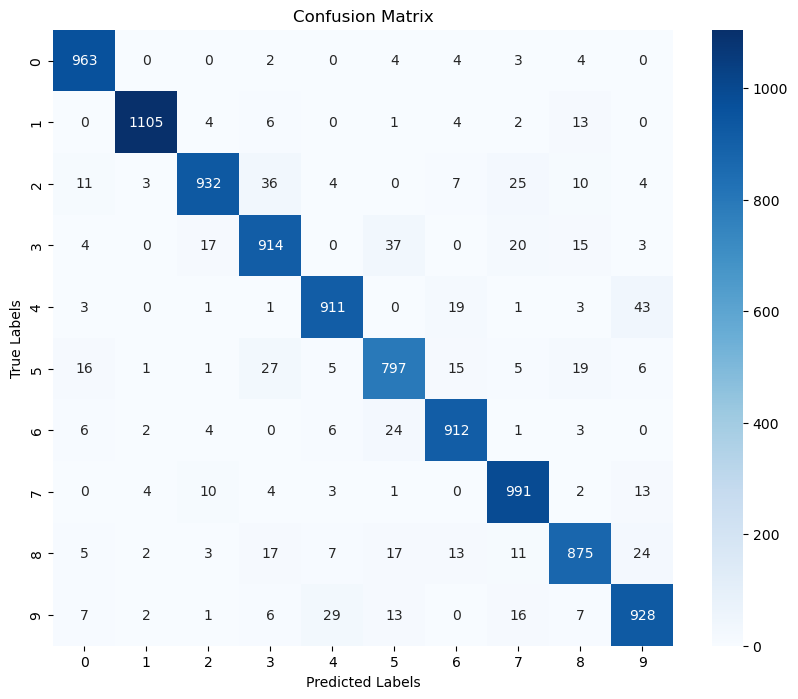

In [157]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the true labels and predicted labels
true_labels = y_test
predicted_labels = np.argmax(predictions, axis=1)

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()